Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL


from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread
from math import ceil

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

In [2]:
# Datapath: https://drive.google.com/file/d/1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs/view?usp=sharing

## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("input/Train")
data_dir_test = pathlib.Path('input/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

from tensorflow.keras.preprocessing import image_dataset_from_directory
train_ds = image_dataset_from_directory(data_dir_train, seed = 123, validation_split = 0.2,subset = 'training', label_mode = 'categorical', image_size = (img_height,img_width), batch_size = batch_size)

 #shuffle=False,                                      

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

val_ds = image_dataset_from_directory(data_dir_train, seed = 123, validation_split = 0.2,subset = 'validation',label_mode = 'categorical',  image_size = (img_height,img_width), batch_size = batch_size) 

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
train_ds

<BatchDataset shapes: ((None, 180, 180, 3), (None, 9)), types: (tf.float32, tf.float32)>

In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
num_classes  = len(class_names)
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

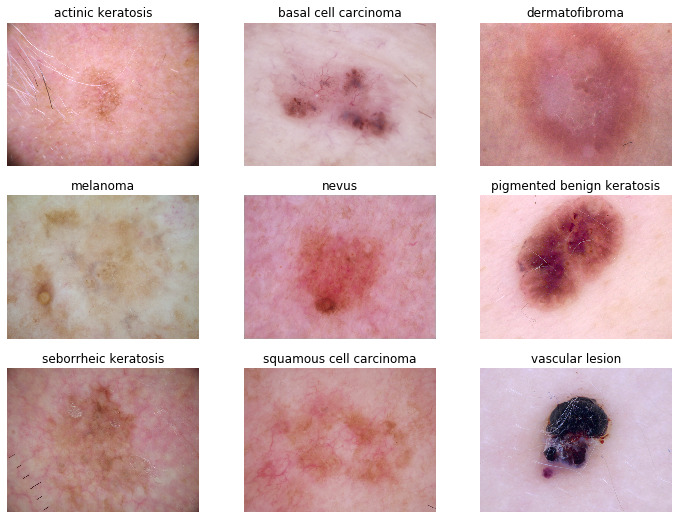

In [10]:
### your code goes here, you can use training or validation data to visualize


# Create dictionary of <class name> - <first file path> from train dataset
file_samples = {}
for class_name in class_names:
    class_path = f"{data_dir_train}/{class_name}"
    file_samples[class_name] = f"{data_dir_train}/{class_name}/{os.listdir(class_path)[0]}"

# Function to print the class_name - image in a grid
def showImagesInGrid(file_samples, no_of_image_rows):
    fig = figure(figsize=(12,9))
    
    number_of_files = len(file_samples)
    no_of_image_cols = ceil(number_of_files/no_of_image_rows)
    
    image_pos = 1
    for class_name,file_path in file_samples.items():
        ax = fig.add_subplot(no_of_image_rows,no_of_image_cols,image_pos)
        image = imread(file_path)
        imshow(image,cmap='Greys_r')
        ax.set_title(class_name)
        axis('off')
        image_pos += 1
    
    plt.show()
    
showImagesInGrid(file_samples, no_of_image_rows = 3) 

NOTE: Below steps are done to speed up computation.

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [12]:
### Your code goes here
# 4DEBUG

# atleast 2 conv layers, 2 dense layers, FC layer, softmax layer

# model = Sequential([
#     -rescaling
#     - conv2d
    
# ])

# guidelines - increase the no. of featuremaps - 32, 64, 128
# increase the feature maps in the deeper layers. Start with around 32.
# kernel size 2 or 3, max 4
# increase the no. of layers instead of kernel size. Will increase the receptive power - will give better model

# Actual code from here

# MODEL - 1: Basic convolutional network. No dropouts, no batch normalization, no regularization.


# Set input shape
input_shape = (img_height, img_width, 3)

# keras.Input(shape=(28, 28)),
#         # Use a Rescaling layer to make sure input values are in the [0, 1] range.
#         layers.experimental.preprocessing.Rescaling(1.0 / 255),
        
# Create model and set the input shape
model = Sequential()
model.add(keras.layers.InputLayer(input_shape))

# Scale the input to [0,1] range
model.add(Rescaling(1/255))
          
# Convolution Layer - Feature maps = 32
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

# Convolution Layer - Feature maps = 64
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

# Convolution Layer - Feature maps = 128
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(512))
#model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
#model.add(Dropout(0.5))

# Softmax Layer
model.add(Dense(num_classes))
model.add(Activation('softmax'))


### Compile the model
Choose an appropirate optimiser and loss function for model training 

####  Set compilation parameters

In [18]:
# Set the compile parameters so that they can be reused for the other models
COMPILE_OPTIMIZED = 'Adam'
COMPILE_LOSS = 'categorical_crossentropy' #'sparse_categorical_crossentropy'
COMPILE_METRICS = ['accuracy']

#### Compile the model

In [16]:

# from keras.optimizers import Adam
# # Define the optimizer
# optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# # Compile the model
# model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [17]:
### Choose an appropirate optimiser and loss function
model.compile(optimizer=COMPILE_OPTIMIZED, 
              loss=COMPILE_LOSS,
              metrics=COMPILE_METRICS)

In [18]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 180, 180, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 178, 178, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 178, 178, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 89, 89, 64)        1

### Train the model -  MODEL 1

Refer: https://keras.io/examples/vision/image_classification_from_scratch/
 

In [19]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 118s 2s/step - loss: 1.7979 - accuracy: 0.3929 - val_loss: 2.0958 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 106s 2s/step - loss: 1.5088 - accuracy: 0.4771 - val_loss: 2.0842 - val_accuracy: 0.1499
Epoch 3/20
56/56 [==============================] - 104s 2s/step - loss: 1.3643 - accuracy: 0.5162 - val_loss: 1.9952 - val_accuracy: 0.2081
Epoch 4/20
56/56 [==============================] - 104s 2s/step - loss: 1.2794 - accuracy: 0.5251 - val_loss: 1.9294 - val_accuracy: 0.3445
Epoch 5/20
56/56 [==============================] - 522s 9s/step - loss: 1.2172 - accuracy: 0.5603 - val_loss: 3.9734 - val_accuracy: 0.2058
Epoch 6/20
56/56 [==============================] - 548s 10s/step - loss: 1.1551 - accuracy: 0.5876 - val_loss: 2.9659 - val_accuracy: 0.2349
Epoch 7/20
56/56 [==============================] - 542s 10s/step - loss: 0.9936 - accuracy: 0.6412 - val_loss: 1.7715 - val_accuracy: 0.3400
Epoch 8/20


### Visualizing training results

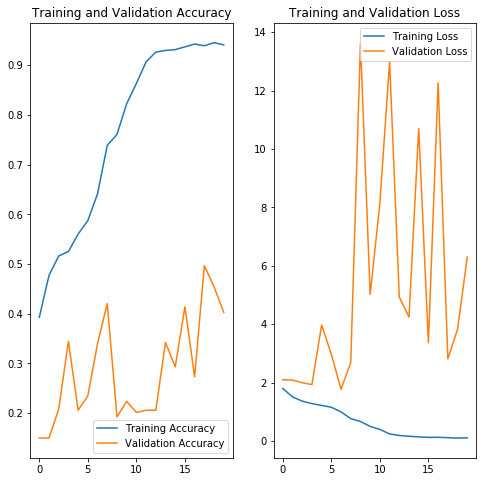

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

<font color = 'Green'>
<b>OBSERVATIONS:</b> <br> 
- As seen in the comparison the training accuracy of the model is good but the validation accuracy is low. <br> 
- There is a big difference between the training & validation accuracy.  <br> 
- Hence we can conclude that the model is clearing overfitting the data. <br> 
- We have not used any dropouts, hence the chances of overfitting is also high. <br> 
</font>

DATA AUGMENTATION - random operations to change the image

In [32]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here


# Referece: https://www.tensorflow.org/tutorials/images/data_augmentation

data_augmentation = tf.keras.Sequential([
  preprocessing.RandomFlip("horizontal_and_vertical"),
  preprocessing.RandomRotation(0.1),
  preprocessing.RandomZoom(0.1)
])


In [33]:
#plt.image('input/Train/actinic keratosis/ISIC_0029460.jpg')

Augmented Images


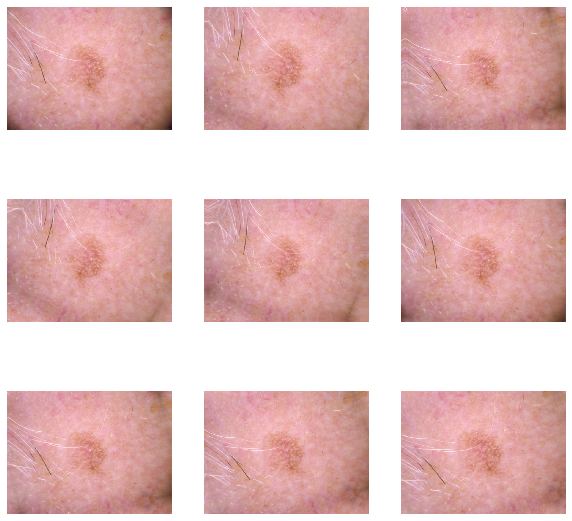

In [34]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
 

# Read the first image from training data
class_path = f"{data_dir_train}/{class_names[0]}"
first_image_path = f"{class_path}/{os.listdir(class_path)[0]}"
first_image = imread(first_image_path)

# Reference: https://www.tensorflow.org/tutorials/images/data_augmentation

# Add the image to a batch
image = tf.expand_dims(first_image, 0)


print('Augmented Images')


# Plot the augmented images
plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")
    
plt.show()

### Todo:
### Create the model, compile and train the model


In [16]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

# MODEL - 2: With data augmentation & dropouts, no batch normalization, no regularization.

# Set input shape
input_shape = (img_height, img_width, 3) 
        
# Create model and set the input shape
model = Sequential()
model.add(keras.layers.InputLayer(input_shape))

# Scale the input to [0,1] range
model.add(Rescaling(1/255))
model.add(data_augmentation) # <----- ADDED FOR MODEL 2
          
# Convolution Layer - Feature maps = 32
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # <----- ADDED FOR MODEL 2

# Convolution Layer - Feature maps = 64
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # <----- ADDED FOR MODEL 2

# Convolution Layer - Feature maps = 128
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # <----- ADDED FOR MODEL 2

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(512))
#model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5)) # <----- ADDED FOR MODEL 2

# Softmax Layer
model.add(Dense(num_classes))
model.add(Activation('softmax'))

 

### Compiling the model

In [19]:
## Your code goes here

### Choose an appropirate optimiser and loss function
model.compile(optimizer=COMPILE_OPTIMIZED, 
              loss=COMPILE_LOSS,
              metrics=COMPILE_METRICS)

### Training the model - MODEL 2

In [20]:
## Your code goes here, note: train your model for 20 epochs

epochs = 20 
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 133s 2s/step - loss: 2.1170 - accuracy: 0.1758 - val_loss: 2.0294 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 148s 3s/step - loss: 2.0347 - accuracy: 0.1853 - val_loss: 2.0217 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 142s 3s/step - loss: 2.0261 - accuracy: 0.1908 - val_loss: 2.0259 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - 133s 2s/step - loss: 2.0311 - accuracy: 0.1925 - val_loss: 2.0221 - val_accuracy: 0.2058
Epoch 5/20
56/56 [==============================] - 133s 2s/step - loss: 2.0243 - accuracy: 0.2042 - val_loss: 2.0246 - val_accuracy: 0.2058
Epoch 6/20
56/56 [==============================] - 134s 2s/step - loss: 2.0235 - accuracy: 0.1942 - val_loss: 2.0245 - val_accuracy: 0.2058
Epoch 7/20
56/56 [==============================] - 127s 2s/step - loss: 2.0269 - accuracy: 0.2093 - val_loss: 2.0246 - val_accuracy: 0.2058
Epoch 8/20
56

### Visualizing the results

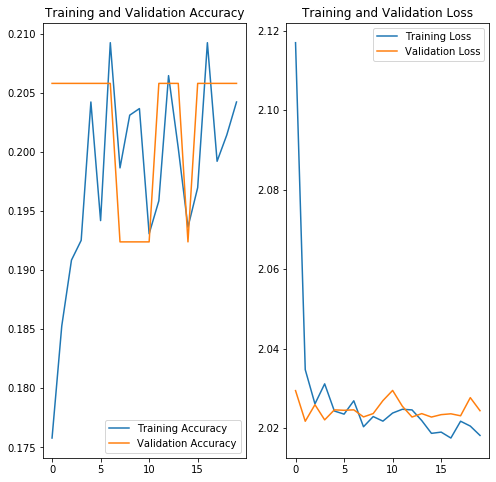

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### TEMP BEGIN

#### MODEL 1.5 - with dropout

In [28]:
##
# MODEL - 1: Basic convolutional network. No dropouts, no batch normalization, no regularization.


# Set input shape
input_shape = (img_height, img_width, 3)

# keras.Input(shape=(28, 28)),
#         # Use a Rescaling layer to make sure input values are in the [0, 1] range.
#         layers.experimental.preprocessing.Rescaling(1.0 / 255),
        
# Create model and set the input shape
model = Sequential()
model.add(keras.layers.InputLayer(input_shape))

# Scale the input to [0,1] range
model.add(Rescaling(1/255))
          
# Convolution Layer - Feature maps = 32
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolution Layer - Feature maps = 64
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolution Layer - Feature maps = 128
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(512))
#model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Softmax Layer
model.add(Dense(num_classes))
model.add(Activation('softmax'))

    
    
# COMPILE THE MODEL
### Choose an appropirate optimiser and loss function
model.compile(optimizer=COMPILE_OPTIMIZED, 
              loss=COMPILE_LOSS,
              metrics=COMPILE_METRICS)


# TRAIN THE MODEL
    
    
epochs = 20 
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)






Epoch 1/20
56/56 [==============================] - 157s 3s/step - loss: 2.0817 - accuracy: 0.2288 - val_loss: 1.9257 - val_accuracy: 0.2886
Epoch 2/20
56/56 [==============================] - 149s 3s/step - loss: 1.8192 - accuracy: 0.3170 - val_loss: 1.6855 - val_accuracy: 0.3893
Epoch 3/20
56/56 [==============================] - 142s 3s/step - loss: 1.7584 - accuracy: 0.3432 - val_loss: 1.6721 - val_accuracy: 0.4273
Epoch 4/20
56/56 [==============================] - 134s 2s/step - loss: 1.7011 - accuracy: 0.3951 - val_loss: 1.8061 - val_accuracy: 0.3199
Epoch 5/20
56/56 [==============================] - 136s 2s/step - loss: 1.6370 - accuracy: 0.3945 - val_loss: 1.6618 - val_accuracy: 0.3758
Epoch 6/20
56/56 [==============================] - 138s 2s/step - loss: 1.6116 - accuracy: 0.4068 - val_loss: 1.5860 - val_accuracy: 0.4094
Epoch 7/20
56/56 [==============================] - 137s 2s/step - loss: 1.5972 - accuracy: 0.4196 - val_loss: 1.5477 - val_accuracy: 0.4541
Epoch 8/20
56

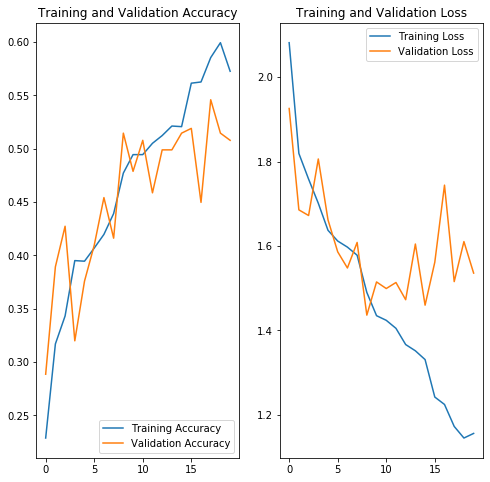

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### MODEL 2.2 - only conv dropout, no final dropout, dense = 512


In [30]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

# MODEL - 2: With data augmentation & dropouts, no batch normalization, no regularization.

# Set input shape
input_shape = (img_height, img_width, 3) 
        
# Create model and set the input shape
model = Sequential()
model.add(keras.layers.InputLayer(input_shape))

# Scale the input to [0,1] range
model.add(Rescaling(1/255))
model.add(data_augmentation) # <----- ADDED FOR MODEL 2
          
# Convolution Layer - Feature maps = 32
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # <----- ADDED FOR MODEL 2

# Convolution Layer - Feature maps = 64
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # <----- ADDED FOR MODEL 2

# Convolution Layer - Feature maps = 128
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # <----- ADDED FOR MODEL 2

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(512))
#model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
#model.add(Dropout(0.5)) # <----- ADDED FOR MODEL 2

# Softmax Layer
model.add(Dense(num_classes))
model.add(Activation('softmax'))

 

 
    
    
# COMPILE THE MODEL
### Choose an appropirate optimiser and loss function
model.compile(optimizer=COMPILE_OPTIMIZED, 
              loss=COMPILE_LOSS,
              metrics=COMPILE_METRICS)


# TRAIN THE MODEL
    
    
epochs = 20 
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)






Epoch 1/20
56/56 [==============================] - 164s 3s/step - loss: 2.2258 - accuracy: 0.1925 - val_loss: 2.0308 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 162s 3s/step - loss: 2.0263 - accuracy: 0.1853 - val_loss: 2.0413 - val_accuracy: 0.1924
Epoch 3/20
56/56 [==============================] - 165s 3s/step - loss: 2.0211 - accuracy: 0.2087 - val_loss: 2.0215 - val_accuracy: 0.2036
Epoch 4/20
56/56 [==============================] - 160s 3s/step - loss: 1.8126 - accuracy: 0.3393 - val_loss: 1.7040 - val_accuracy: 0.3647
Epoch 5/20
56/56 [==============================] - 171s 3s/step - loss: 1.6951 - accuracy: 0.3789 - val_loss: 1.5894 - val_accuracy: 0.4407
Epoch 6/20
56/56 [==============================] - 163s 3s/step - loss: 1.5814 - accuracy: 0.4442 - val_loss: 1.5203 - val_accuracy: 0.4609
Epoch 7/20
56/56 [==============================] - 165s 3s/step - loss: 1.5190 - accuracy: 0.4671 - val_loss: 1.6051 - val_accuracy: 0.4027
Epoch 8/20
56

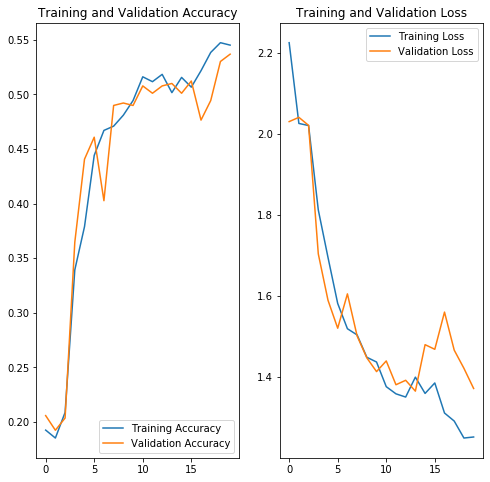

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### MODEL 2.3 - with final dropout, dense=256

In [26]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

# MODEL - 2: With data augmentation, no dropouts, no batch normalization, no regularization.

# Set input shape
input_shape = (img_height, img_width, 3) 
        
# Create model and set the input shape
model = Sequential()
model.add(keras.layers.InputLayer(input_shape))

# Scale the input to [0,1] range
model.add(Rescaling(1/255))
model.add(data_augmentation) # <----- ADDED FOR MODEL 2
          
# Convolution Layer - Feature maps = 32
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.1)) # <----- ADDED FOR MODEL 2

# Convolution Layer - Feature maps = 64
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.1)) # <----- ADDED FOR MODEL 2

# Convolution Layer - Feature maps = 128
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.1)) # <----- ADDED FOR MODEL 2

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(256))
#model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5)) # <----- ADDED FOR MODEL 2

# Softmax Layer
model.add(Dense(num_classes))
model.add(Activation('softmax'))

 
    
    
# COMPILE THE MODEL
### Choose an appropirate optimiser and loss function
model.compile(optimizer=COMPILE_OPTIMIZED, 
              loss=COMPILE_LOSS,
              metrics=COMPILE_METRICS)


# TRAIN THE MODEL
    
    
epochs = 20 
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)






Epoch 1/20
56/56 [==============================] - 137s 2s/step - loss: 2.0692 - accuracy: 0.1992 - val_loss: 1.9426 - val_accuracy: 0.3199
Epoch 2/20
56/56 [==============================] - 134s 2s/step - loss: 2.0416 - accuracy: 0.1814 - val_loss: 2.0200 - val_accuracy: 0.1924
Epoch 3/20
56/56 [==============================] - 137s 2s/step - loss: 2.0628 - accuracy: 0.2182 - val_loss: 2.0524 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - 138s 2s/step - loss: 2.0364 - accuracy: 0.2026 - val_loss: 2.0232 - val_accuracy: 0.2058
Epoch 5/20
56/56 [==============================] - 158s 3s/step - loss: 2.0246 - accuracy: 0.2015 - val_loss: 2.0257 - val_accuracy: 0.1924
Epoch 6/20
56/56 [==============================] - 164s 3s/step - loss: 2.0314 - accuracy: 0.1920 - val_loss: 2.0407 - val_accuracy: 0.2058
Epoch 7/20
56/56 [==============================] - 155s 3s/step - loss: 2.0299 - accuracy: 0.1914 - val_loss: 2.0255 - val_accuracy: 0.1924
Epoch 8/20
56

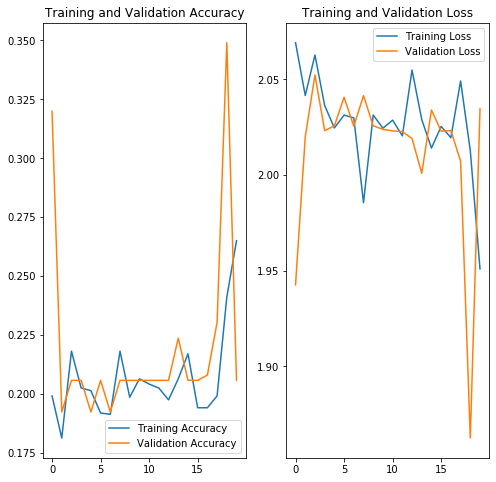

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### MODEL 2.5 - without dropout only augmentation

In [22]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

# MODEL - 2: With data augmentation, no dropouts, no batch normalization, no regularization.

# Set input shape
input_shape = (img_height, img_width, 3) 
        
# Create model and set the input shape
model = Sequential()
model.add(keras.layers.InputLayer(input_shape))

# Scale the input to [0,1] range
model.add(Rescaling(1/255))
model.add(data_augmentation) # <----- ADDED FOR MODEL 2
          
# Convolution Layer - Feature maps = 32
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.1)) # <----- ADDED FOR MODEL 2

# Convolution Layer - Feature maps = 64
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.1)) # <----- ADDED FOR MODEL 2

# Convolution Layer - Feature maps = 128
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.1)) # <----- ADDED FOR MODEL 2

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(512))
#model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
#model.add(Dropout(0.4)) # <----- ADDED FOR MODEL 2

# Softmax Layer
model.add(Dense(num_classes))
model.add(Activation('softmax'))

 
    
    
# COMPILE THE MODEL
### Choose an appropirate optimiser and loss function
model.compile(optimizer=COMPILE_OPTIMIZED, 
              loss=COMPILE_LOSS,
              metrics=COMPILE_METRICS)


# TRAIN THE MODEL
    
    
epochs = 20 
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)






Epoch 1/20
56/56 [==============================] - 116s 2s/step - loss: 1.9942 - accuracy: 0.2500 - val_loss: 1.9187 - val_accuracy: 0.3110
Epoch 2/20
56/56 [==============================] - 116s 2s/step - loss: 1.8203 - accuracy: 0.3404 - val_loss: 1.8777 - val_accuracy: 0.3065
Epoch 3/20
56/56 [==============================] - 117s 2s/step - loss: 1.7051 - accuracy: 0.3778 - val_loss: 1.6029 - val_accuracy: 0.4564
Epoch 4/20
56/56 [==============================] - 117s 2s/step - loss: 1.7033 - accuracy: 0.3789 - val_loss: 1.6007 - val_accuracy: 0.4519
Epoch 5/20
56/56 [==============================] - 116s 2s/step - loss: 1.6388 - accuracy: 0.4079 - val_loss: 1.6948 - val_accuracy: 0.4094
Epoch 6/20
56/56 [==============================] - 113s 2s/step - loss: 1.5495 - accuracy: 0.4581 - val_loss: 1.5531 - val_accuracy: 0.4676
Epoch 7/20
56/56 [==============================] - 114s 2s/step - loss: 1.4914 - accuracy: 0.4821 - val_loss: 1.4994 - val_accuracy: 0.4832
Epoch 8/20
56

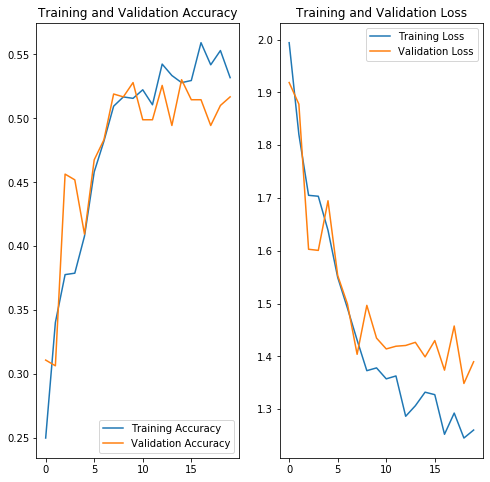

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### MODEL 2.7 - with dropout, batch normalization, augmentation


In [24]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

# MODEL - 2: With data augmentation,  dropouts,  batch normalization,  regularization.

# Set input shape
input_shape = (img_height, img_width, 3) 
        
# Create model and set the input shape
model = Sequential()
model.add(keras.layers.InputLayer(input_shape))

# Scale the input to [0,1] range
model.add(Rescaling(1/255))
model.add(data_augmentation) # <----- ADDED FOR MODEL 2
          
# Convolution Layer - Feature maps = 32
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1)) # <----- ADDED FOR MODEL 2

# Convolution Layer - Feature maps = 64
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1)) # <----- ADDED FOR MODEL 2

# Convolution Layer - Feature maps = 128
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1)) # <----- ADDED FOR MODEL 2

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(512))
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5)) # <----- ADDED FOR MODEL 2

# Softmax Layer
model.add(Dense(num_classes))
model.add(Activation('softmax'))

 
    
    
# COMPILE THE MODEL
### Choose an appropirate optimiser and loss function
model.compile(optimizer=COMPILE_OPTIMIZED, 
              loss=COMPILE_LOSS,
              metrics=COMPILE_METRICS)


# TRAIN THE MODEL
    
    
epochs = 20 
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)






Epoch 1/20
56/56 [==============================] - 177s 3s/step - loss: 43.4513 - accuracy: 0.2394 - val_loss: 34.3442 - val_accuracy: 0.1790
Epoch 2/20
56/56 [==============================] - 178s 3s/step - loss: 9.4976 - accuracy: 0.2506 - val_loss: 38.0493 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 202s 4s/step - loss: 7.4136 - accuracy: 0.2294 - val_loss: 56.2180 - val_accuracy: 0.1879
Epoch 4/20
56/56 [==============================] - 189s 3s/step - loss: 7.0655 - accuracy: 0.2015 - val_loss: 49.6926 - val_accuracy: 0.2081
Epoch 5/20
56/56 [==============================] - 179s 3s/step - loss: 6.9039 - accuracy: 0.2015 - val_loss: 46.1864 - val_accuracy: 0.2125
Epoch 6/20
56/56 [==============================] - 184s 3s/step - loss: 6.7712 - accuracy: 0.2087 - val_loss: 45.8175 - val_accuracy: 0.2215
Epoch 7/20
56/56 [==============================] - 180s 3s/step - loss: 6.6735 - accuracy: 0.2070 - val_loss: 29.4223 - val_accuracy: 0.2215
Epoch

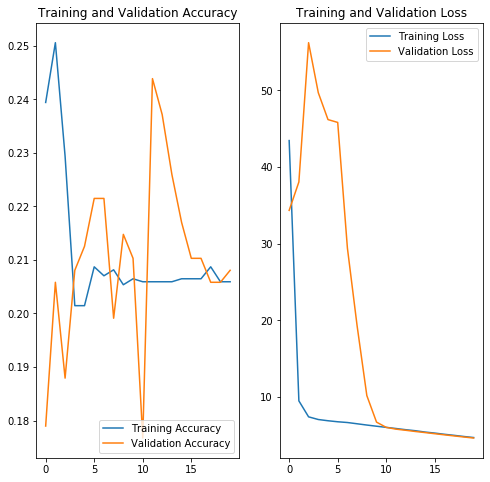

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### MODEL 2.8 - different augmentation (rest like model 2 )

In [37]:

data_augmentation_diff = tf.keras.Sequential([
  preprocessing.RandomFlip("horizontal_and_vertical"),
  preprocessing.RandomRotation(0.1)
  #preprocessing.RandomZoom(0.1)
])


In [38]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

# MODEL - 2: With data augmentation & dropouts, no batch normalization, no regularization.

# Set input shape
input_shape = (img_height, img_width, 3) 
        
# Create model and set the input shape
model = Sequential()
model.add(keras.layers.InputLayer(input_shape))

# Scale the input to [0,1] range
model.add(Rescaling(1/255))
model.add(data_augmentation_diff) # <----- ADDED FOR MODEL 2
          
# Convolution Layer - Feature maps = 32
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # <----- ADDED FOR MODEL 2

# Convolution Layer - Feature maps = 64
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # <----- ADDED FOR MODEL 2

# Convolution Layer - Feature maps = 128
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # <----- ADDED FOR MODEL 2

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(512))
#model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5)) # <----- ADDED FOR MODEL 2

# Softmax Layer
model.add(Dense(num_classes))
model.add(Activation('softmax'))

 

 
    
    
# COMPILE THE MODEL
### Choose an appropirate optimiser and loss function
model.compile(optimizer=COMPILE_OPTIMIZED, 
              loss=COMPILE_LOSS,
              metrics=COMPILE_METRICS)


# TRAIN THE MODEL
    
    
epochs = 20 
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)






Epoch 1/20
56/56 [==============================] - 171s 3s/step - loss: 2.3697 - accuracy: 0.1936 - val_loss: 2.0344 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 195s 3s/step - loss: 2.0223 - accuracy: 0.2081 - val_loss: 1.9130 - val_accuracy: 0.3177
Epoch 3/20
56/56 [==============================] - 179s 3s/step - loss: 1.8317 - accuracy: 0.3460 - val_loss: 1.7234 - val_accuracy: 0.4049
Epoch 4/20
56/56 [==============================] - 175s 3s/step - loss: 1.6977 - accuracy: 0.3834 - val_loss: 1.6050 - val_accuracy: 0.4206
Epoch 5/20
56/56 [==============================] - 169s 3s/step - loss: 1.6898 - accuracy: 0.3778 - val_loss: 1.7287 - val_accuracy: 0.3758
Epoch 6/20
56/56 [==============================] - 156s 3s/step - loss: 1.6331 - accuracy: 0.4425 - val_loss: 1.6363 - val_accuracy: 0.4385
Epoch 7/20
56/56 [==============================] - 177s 3s/step - loss: 1.5852 - accuracy: 0.4503 - val_loss: 1.4798 - val_accuracy: 0.4720
Epoch 8/20
56

### TEMP END

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

                           Count
actinic keratosis            114
basal cell carcinoma         376
dermatofibroma                95
melanoma                     438
nevus                        357
pigmented benign keratosis   462
seborrheic keratosis          77
squamous cell carcinoma      181
vascular lesion              139


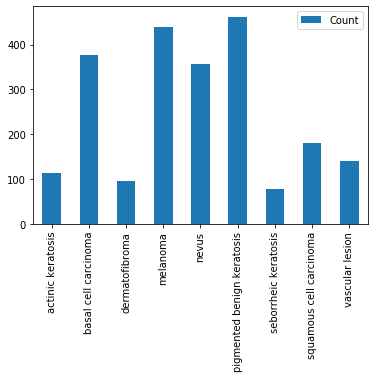

In [39]:
## Your code goes here.

# Get the count of class name and no. of samples for each class in the train directory
class_count = pd.DataFrame(columns=['Count'])
for class_name in class_names:
    path, dirs, files = next(os.walk(f"{data_dir_train}/{class_name}")) 
    class_count.loc[class_name] = len(files)
 
print(class_count)

# Plot a bar graph to check the distribution
class_count.plot.bar()
     

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?
<font color='Green'>
     <br>
     <br>
<b>OBSERVATIONS</b><br>
- As noticed in the above chart & table, there is class imbalance in the data. <br>
- Classes like 'dermatofibroma' & 'seborrheic keratosis' have less than samples each<br>
- Classes like 'melanoma' & 'pigmented benign keratosis' have more than 400 samples each (apprx 4 to 6 times more than the classes with low samples)<br>
- There is a possibility that the classes with more samples might dominate in the model, hence it would be good to address the class imbalance issue.<br>
    <br>
    <br>
<b>Class with least number of samples:</b> 'seborrheic keratosis' with 77 samples<br>
<b>Class with maximum number of samples (dominant class):</b> 'pigmented benign keratosis' with 462 samples (6 times more than 'seborrheic keratosis')
     <br>
</font>


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
# !pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [40]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(f'Image count before augmentor:{image_count_train}')

Image count before augmentor:0


In [41]:
path_to_training_dataset=data_dir_train
print(data_dir_train)
import Augmentor
for class_name in class_names:
    print(class_name)
    p = Augmentor.Pipeline(f'{path_to_training_dataset}/{class_name}')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

input/Train
actinic keratosis
Initialised with 114 image(s) found.
Output directory set to input/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x15F8BDF28>: 100%|██████████| 500/500 [00:04<00:00, 121.99 Samples/s]


basal cell carcinoma


Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to input/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x15F8821D0>: 100%|██████████| 500/500 [00:04<00:00, 118.41 Samples/s]                  
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x15FC62898>:   0%|          | 1/500 [00:00<00:52,  9.51 Samples/s]                  

dermatofibroma
Initialised with 95 image(s) found.
Output directory set to input/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x10236E0B8>: 100%|██████████| 500/500 [00:04<00:00, 115.55 Samples/s]                  


melanoma


Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to input/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x15E4B4320>: 100%|██████████| 500/500 [00:25<00:00, 19.29 Samples/s]                   


nevus


Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to input/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x15F7F64A8>: 100%|██████████| 500/500 [00:25<00:00, 19.36 Samples/s]                   


pigmented benign keratosis


Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to input/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x15FD994A8>: 100%|██████████| 500/500 [00:04<00:00, 100.67 Samples/s]                  
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

seborrheic keratosis
Initialised with 77 image(s) found.
Output directory set to input/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x15FD990F0>: 100%|██████████| 500/500 [00:12<00:00, 40.94 Samples/s]                  
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

squamous cell carcinoma
Initialised with 181 image(s) found.
Output directory set to input/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x15FBDE400>: 100%|██████████| 500/500 [00:04<00:00, 103.97 Samples/s]                  
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

vascular lesion
Initialised with 139 image(s) found.
Output directory set to input/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x15F05E668>: 100%|██████████| 500/500 [00:05<00:00, 93.13 Samples/s]                   


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [42]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(f'Image count after augmentor:{image_count_train}')

Image count after augmentor:4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [52]:
from glob import glob
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#path_list

In [53]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#lesion_list_new

In [54]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [61]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
# new_df = original_df.append(df2)
df2['Label'].value_counts()

seborrheic keratosis          500
squamous cell carcinoma       500
dermatofibroma                500
actinic keratosis             500
vascular lesion               500
nevus                         500
pigmented benign keratosis    500
melanoma                      500
basal cell carcinoma          500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [65]:
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset = 'training',
    label_mode = 'categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size)
 
            

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [66]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
#     shuffle=False, 
    label_mode = 'categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [67]:
## your code goes here

## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

# MODEL - 3: Model architecture is same as model 2, 
# Here to address class imbalance, additional 500 samples have been added to each class - Augmentor. 
# Model has scaling, data augmentation & dropouts, no batch normalization, no regularization.

# Set input shape
input_shape = (img_height, img_width, 3) 
        
# Create model and set the input shape
model = Sequential()
model.add(keras.layers.InputLayer(input_shape))

# Scale the input to [0,1] range
model.add(Rescaling(1/255))
model.add(data_augmentation) 
          
# Convolution Layer - Feature maps = 32
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  

# Convolution Layer - Feature maps = 64
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  

# Convolution Layer - Feature maps = 128
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(512))
#model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))  

# Softmax Layer
model.add(Dense(num_classes))
model.add(Activation('softmax'))

 

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [70]:
## your code goes here
### Choose an appropirate optimiser and loss function
model.compile(optimizer=COMPILE_OPTIMIZED, 
              loss=COMPILE_LOSS,
              metrics=COMPILE_METRICS)

#### **Todo:**  Train your model - MODEL 3

In [71]:
epochs = 30
## Your code goes here, use 50 epochs.

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

#4debug - expect around 70% to 80% accuracy

Epoch 1/30
169/169 [==============================] - 344s 2s/step - loss: 2.1614 - accuracy: 0.2654 - val_loss: 2.2494 - val_accuracy: 0.1158
Epoch 2/30
169/169 [==============================] - 367s 2s/step - loss: 1.7493 - accuracy: 0.3229 - val_loss: 3.1858 - val_accuracy: 0.1403
Epoch 3/30
169/169 [==============================] - 386s 2s/step - loss: 1.6603 - accuracy: 0.3511 - val_loss: 3.3968 - val_accuracy: 0.1477
Epoch 4/30
169/169 [==============================] - 382s 2s/step - loss: 1.6484 - accuracy: 0.3702 - val_loss: 1.9822 - val_accuracy: 0.2584
Epoch 5/30
169/169 [==============================] - 391s 2s/step - loss: 1.5744 - accuracy: 0.3971 - val_loss: 3.3336 - val_accuracy: 0.2116
Epoch 6/30
169/169 [==============================] - 2352s 14s/step - loss: 1.5501 - accuracy: 0.4006 - val_loss: 26.7408 - val_accuracy: 0.1039
Epoch 7/30
169/169 [==============================] - 403s 2s/step - loss: 1.5209 - accuracy: 0.4101 - val_loss: 8.9630 - val_accuracy: 0.1

#### **Todo:**  Visualize the model results

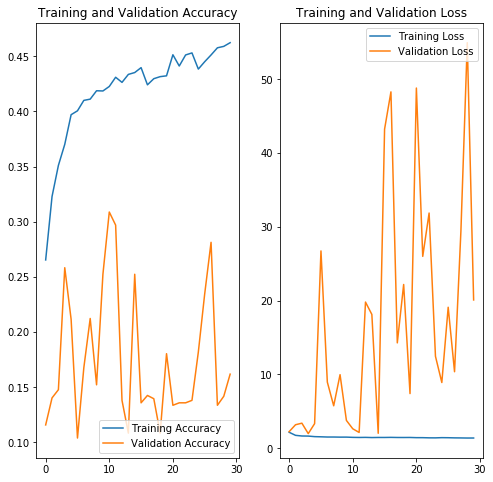

In [72]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



### ADDITIONAL ANALYSIS

#### CHECK ON TEST DATA

In [ ]:
## Read the test dataset
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writing the dataset

from tensorflow.keras.preprocessing import image_dataset_from_directory
test_ds = image_dataset_from_directory(data_dir_test, seed = 123,  label_mode = 'categorical', image_size = (img_height,img_width), batch_size = batch_size)

 #shuffle=False,                                      

In [ ]:
# evaluate model
_, acc = model.evaluate(test_ds, verbose=0)

In [ ]:
print(acc)

In [ ]:
# SOME POINTS

In [ ]:
# 4DEBUG not required to check on test data. Evaluator will do it.

In [ ]:
MODEL 1: Overfit model
MODEL 2: Augmentation: Distorting the information. Like how for dropout - we remove some data - to prevent overfitting as the input changes
MODEL 3: Augmentator: we are adding more input samples 
        
Test accuracy will be lesser

In [ ]:
Samples are less. Real world - pretrained model will be used. 

# REFERENCES

In [ ]:
https://www.kaggle.com/sid321axn/step-wise-approach-cnn-model-77-0344-accuracy